In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

### Dataset

Text(0, 0.5, 'Target')

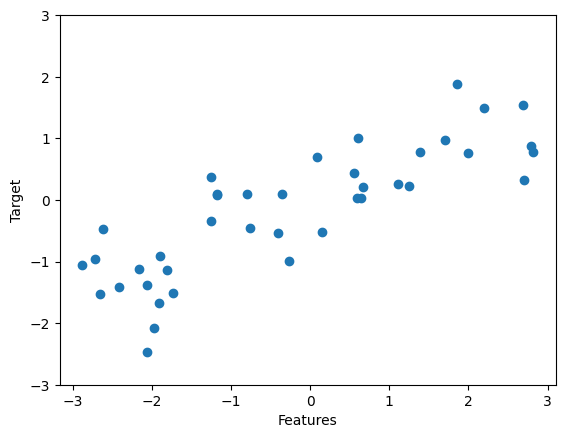

In [4]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Features')
plt.ylabel('Target')

In [5]:
def plot_knn_regression(n_neighbors=1):
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

    upylim = y.max()*1.5
    dntlim = y.min()*1.5

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test,  dntlim *np.ones(len(X_test)), '*', c=cm3(2), markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, dntlim, upylim, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(dntlim, upylim)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    

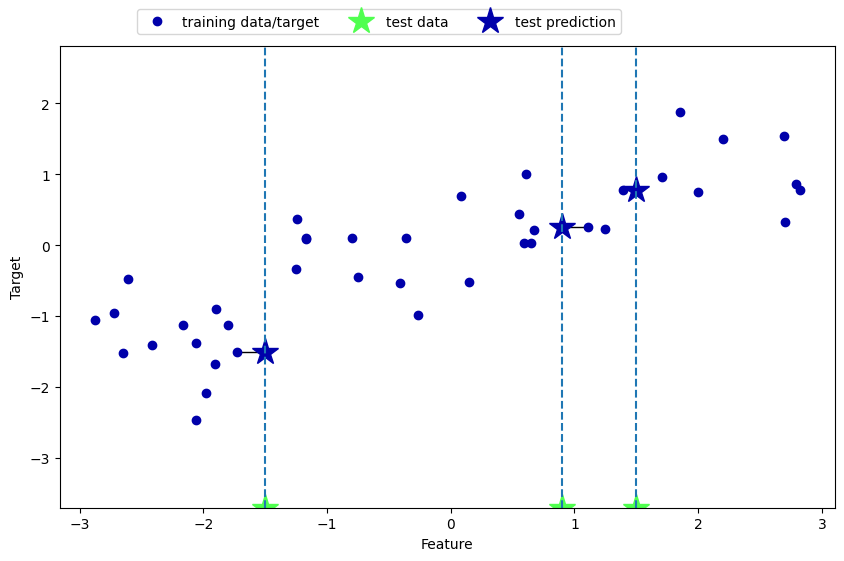

In [19]:
plot_knn_regression(1)

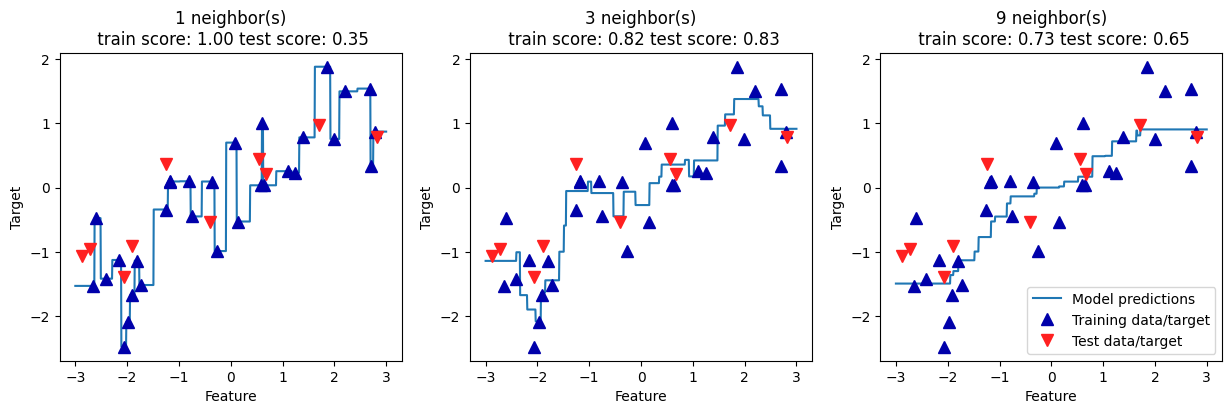

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cm2 = ListedColormap(['#0000aa', '#ff2020'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[2].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

Text(0, 0.5, 'Target')

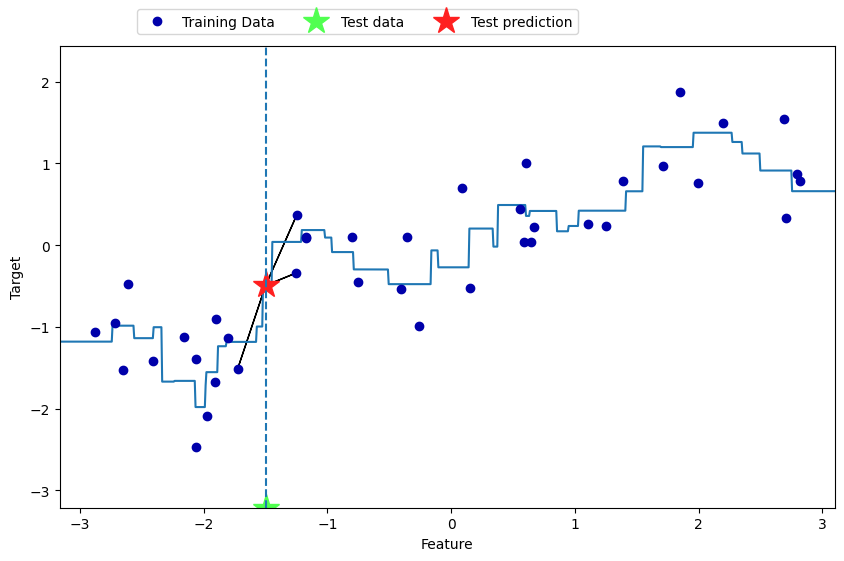

In [33]:
n_neighbors=3
X, y = make_wave(n_samples=40)
X_test = np.array([[-1.5]])#, [0.9], [1.5]

dist = euclidean_distances(X, X_test)
closest = np.argsort(dist, axis=0)

plt.figure(figsize=(10, 6))

model = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
y_pred = model.predict(X_test)

for x, y_, neighbors in zip(X_test, y_pred, closest.T):
    for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                        head_width=0, fc='k', ec='k')

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

upylim = y.max()*1.3
dnylim = y.min()*1.3
rightxlim = X.max()*1.1
leftxlim = X.min()*1.1

line = np.linspace(leftxlim, rightxlim, 1000).reshape(-1, 1)
plt.plot(line, model.predict(line))

train, = plt.plot(X, y, 'o', c=cm3(0))
test, = plt.plot(X_test,  dnylim *np.ones(len(X_test)), '*', c=cm3(2), markersize=20)
pred, = plt.plot(X_test, y_pred, '*', c=cm3(1), markersize=20)
plt.vlines(X_test, dnylim, upylim, linestyle="--")

plt.legend([train, test, pred], ["Training Data", "Test data", "Test prediction"], ncol=3, loc=(.1, 1.025))
plt.ylim(dnylim, upylim)
plt.xlim(leftxlim, rightxlim)
plt.xlabel("Feature")
plt.ylabel("Target")

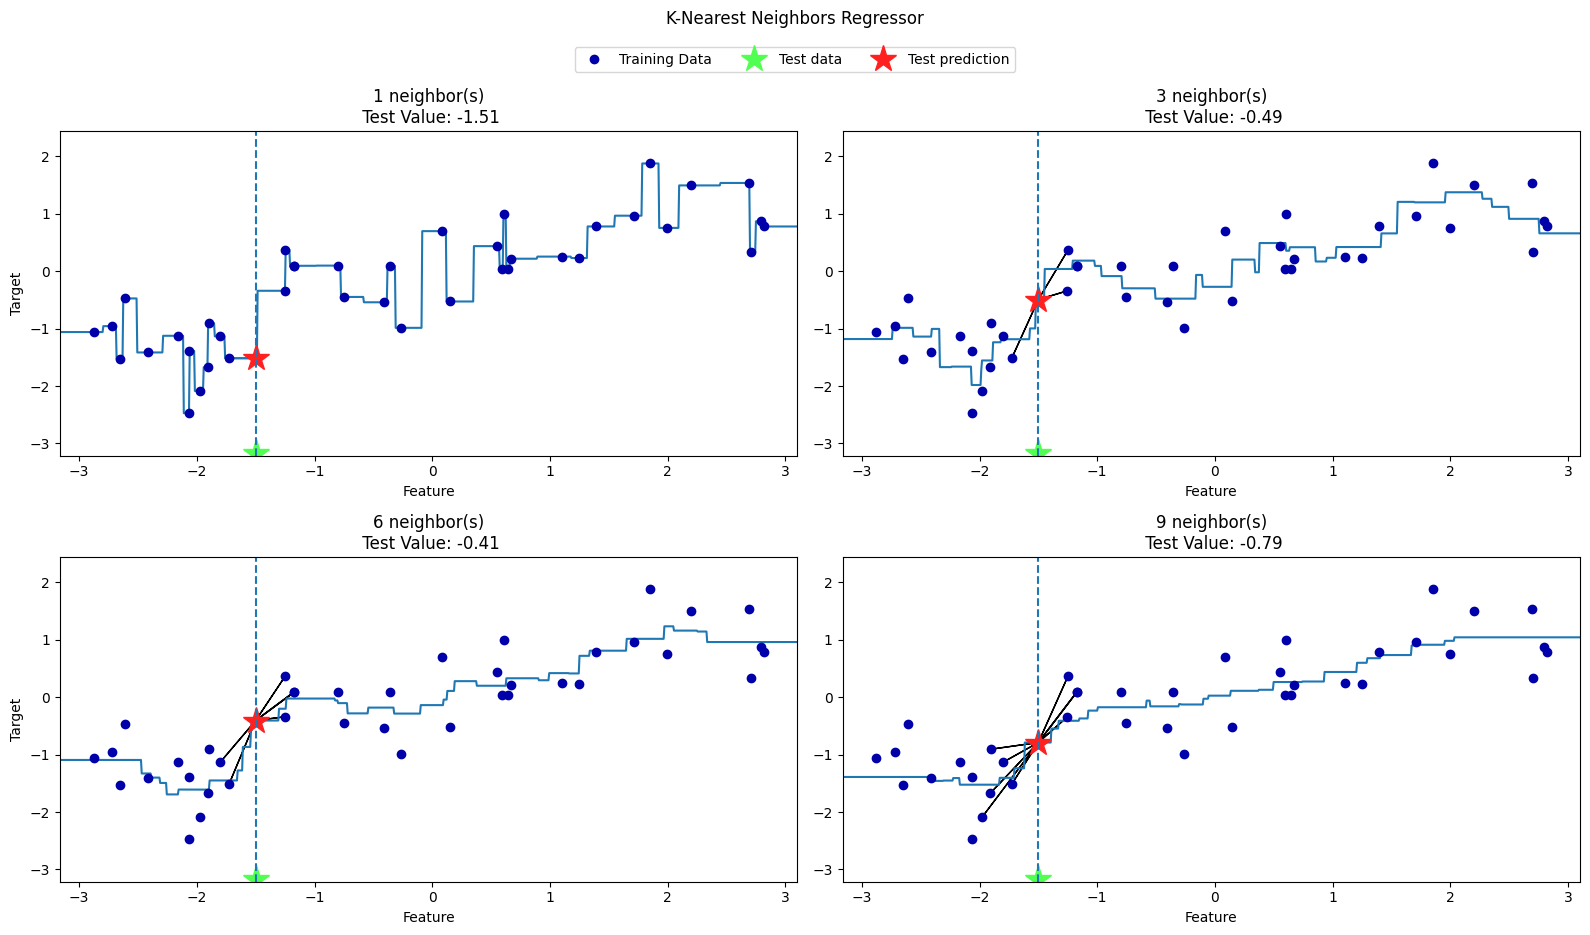

In [107]:
neighbors = [1,3,6,9]
X, y = make_wave(n_samples=40)
X_test = np.array([[-1.5]])#

dist = euclidean_distances(X, X_test)
closest = np.argsort(dist, axis=0)

fig, axes = plt.subplots(2, 2, figsize=(16,10))
axes = axes.flatten()

for n_neighbors, ax in zip(neighbors, axes):

    model = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = model.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                ax.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                            head_width=0, fc='k', ec='k')

    cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

    upylim = y.max()*1.3
    dnylim = y.min()*1.3
    rightxlim = X.max()*1.1
    leftxlim = X.min()*1.1

    line = np.linspace(leftxlim, rightxlim, 1000).reshape(-1, 1)
    ax.plot(line, model.predict(line))

    train, = ax.plot(X, y, 'o', c=cm3(0))
    test, = ax.plot(X_test,  dnylim *np.ones(len(X_test))+.05, '*', c=cm3(2), markersize=20)
    pred, = ax.plot(X_test, y_pred, '*', c=cm3(1), markersize=20)
    ax.vlines(X_test, dnylim, upylim, linestyle="--")

    ax.set_title(f"{n_neighbors} neighbor(s)\n Test Value: {y_pred.item():.2f}")

    ax.set_ylim(dnylim, upylim)
    ax.set_xlim(leftxlim, rightxlim)
    ax.set_xlabel('Feature')
    axes[0].set_ylabel('Target')
    axes[2].set_ylabel('Target')

fig.suptitle("K-Nearest Neighbors Regressor", y = 1.03 )
fig.legend([train, test, pred], ["Training Data", "Test data", "Test prediction"], 
           loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))
plt.tight_layout(rect=[0, 0.1, 1, 1]) 